In [1]:
%matplotlib inline

In [2]:
import pickle
import matplotlib.pyplot as plt

In [3]:
with open('../results/samples/200626_PosteriorSNL_hayObjectives_VI_samples.pickle', 'rb') as handle:
    saved_samples = pickle.load(handle)

In [4]:
import sys
sys.path.append('../')

In [5]:
len(saved_samples)

10000

In [6]:
from utils import simulator_wrapper, simulator_ss_wrapper, load_ground_truth_params, summary_stats

/home/michael/Documents/Data_arco8/test_env/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/michael/Documents/in_silico_framework/model_data_base/distributed_lock.py:14: UserWarning: environment variable ISF_DISTRIBUTED_LOCK_CONFIG is not set. Falling back to default configuration.
  'Falling back to default configuration.')
/home/michael/Documents/in_silico_framework/model_data_base/distributed_lock.py:33: UserWarning: Using file based locking.Please be careful on nfs mounts as file based locking has issues in this case.
  warnings.warn('Using file based locking.'


trying to connect to distributed locking server {'config': {'socket_timeout': 1, 'host': 'spock', 'port': 8885}, 'type': 'redis'}
trying to connect to distributed locking server {'config': {'socket_timeout': 1, 'host': 'localhost', 'port': 6379}, 'type': 'redis'}
trying to connect to distributed locking server {'type': 'file'}
Current version: v0.0.1+646.ga423967
Current pid: 114596
Loading mechanisms:
setting up local multiprocessing framework ... done


The loaded modules with __version__ attribute are:
IPython: 5.1.0, Interface: v0.0.1+646.ga423967, SocketServer: 0.4, _ast: 82160, _csv: 1.0, _ctypes: 1.1.0, _struct: 0.2, argparse: 1.1, ast: 82160, blosc: 1.5.1, bluepyopt: 1.8.5, bottleneck: 1.1.0, cPickle: 1.71, cffi: 1.7.0, cgi: 2.6, chest: 0.2.3, click: 6.6, cloudpickle: 0.2.2, colorama: 0.3.7, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.8.0, dask: 0.18.2, dateutil: 2.5.3, deap: 1.2, decimal: 1.70, decorator: 4.0.10, distributed: 1.22.1, distutils: 2.7.12, email: 4.0.3, fu

### Inspect a saved sample

In [7]:
#saved_samples[0]

### Load the ground truth sample

In [8]:
gt_params = load_ground_truth_params()

In [9]:
#gt_params

In [10]:
output = simulator_wrapper(gt_params)
output_ss = simulator_ss_wrapper(gt_params)

/home/michael/Documents/in_silico_framework/biophysics_fitting/hay_evaluation.py:42: UserWarning: Setting up hay evaluator. This loads several variables to the NEURON envioronment. Also, it creates a unconnected cell (which is very small ~ 1 compartment) which has the purpose to 'just be there' such that the functionality necessary to evaluate voltage traces is available. This has the side effect that in the case of the variable time step solver, the timesteps can be changed.
  "case of the variable time step solver, the timesteps can be changed."


	0 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	0 
	0 
full list is of length 5 
	0 
	0 
full list is of length 5 
	0 
	0 
	0 
	0 
record path is ga_result_89_CDK20050712_BAC_run1_seed_4567
population file is random
called load population
ga_result_86_CDK20041214_BAC_run5_seed_4223/clean_population_file.txt
breed matrix rows 1000 
breed matrix columns 32 
population loaded from file
called load error
error matrix loaded from file
take_vec is 
stim num is5 
4  files loaded successfuly
	1 
stat_mean Vector[1092] 
stat_std Vector[1093] 
punish 250 
use_control 0 
rep_num 1 
minspikenum 2 
stim_del 295 
stim_dur 45 
apcvecList.o[0].size: 3 
feature_num 6 
Checking for minimum spike number...
Checking for returning to rest...
Checking for spikes before stimulus...
Calculating feature AHP_depth_abs
	Err: 0.73103343 
	STD: 4 
	norm. diff: 0.18275836 
Feature error: 0.18275836 
Calculating feature AP_height
Mean spike height: 3.3837656 
	Err: 3.3837656 
	STD: 5 
	norm. diff: 0.67675313 
Feature error: 0.6767

In [11]:
output_ss

{'BAC_APheight': 0.676753127459311,
 'BAC_ISI': 2.05966611846767,
 'BAC_ahpdepth': 0.18275835693996356,
 'BAC_caSpike_height': 1.5292215518128254,
 'BAC_caSpike_width': 0.6274534587685928,
 'BAC_spikecount': 0.0,
 'bAP_APheight': 1.0713827300032157,
 'bAP_APwidth': 1.8408072988456752,
 'bAP_att2': 0.504650278595571,
 'bAP_att3': 0.01819408397980317,
 'bAP_spikecount': 0.0}

In [12]:
import numpy as np
np_vals = []
for key in output.keys():
    np_vals.append(output[key])
np_vals = np.asarray(np_vals)

In [13]:
#np.savez('/home/michael/Documents/lfi-experiments/bursting_biophysics/results/observation/x_o_hay.npz', x_o=np_vals, x_o_dict=output)

In [14]:
#import pickle
#with open('/home/michael/Documents/lfi-experiments/bursting_biophysics/results/observation/x_o_hay.pickle', 'wb') as handle:
#    pickle.dump(np_vals, handle)

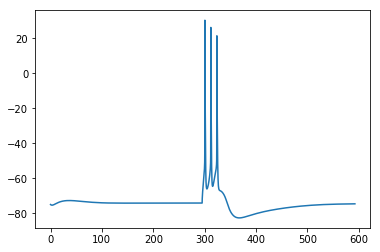

In [15]:
plt.plot(output['BAC.hay_measure']['tVec'], output['BAC.hay_measure']['vList'][0])
plt.show()

In [16]:
x_o = summary_stats(output, n_xcorr=0, n_mom=4)

In [18]:
#import pickle
#with open('../results/observation/x_o_new_ss.pickle', 'wb') as handle:
#    pickle.dump(x_o, handle)
#import numpy as np
#np.savez('../results/observation/x_o_new_ss.npz', x_o=x_o)

In [19]:
x_o

array([  3.00000000e+00,  -7.39715077e+01,   3.15366623e-03,
        -7.03786414e+01,   2.59094928e+02,   2.74301534e+00,
         1.35979822e+01,   1.00000000e+00,  -7.03730405e+01,
         2.52811546e-03,  -5.46356273e+01,   9.48006953e+02,
         7.50345438e-01,   1.92759465e+00,   1.00000000e+00,
        -7.39715077e+01,   3.15366623e-03,  -7.35665842e+01,
         2.94315531e+01,   1.06305866e+01,   1.55596329e+02,
         0.00000000e+00,  -7.03730405e+01,   2.52811546e-03,
        -6.97927307e+01,   2.86956580e+01,   4.82280892e+00,
         2.82436706e+01,   1.00000000e+00,  -6.89810548e+01,
         2.48961918e-03,  -6.84974579e+01,   2.71127093e+01,
         4.67028374e+00,   2.60551954e+01])

### Simulate posterior samples

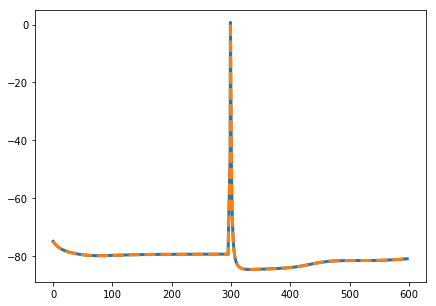

In [20]:
fig, ax = plt.subplots(1,1, figsize=(7, 5))

for i in range(1):
    output = simulator_wrapper(saved_samples[i])
    plt.plot(output['bAP.hay_measure']['tVec'], output['bAP.hay_measure']['vList'][0], linewidth=3.0)
    plt.plot(output['BAC.hay_measure']['tVec'], output['BAC.hay_measure']['vList'][0], linestyle='--', linewidth=3.0)
plt.show()

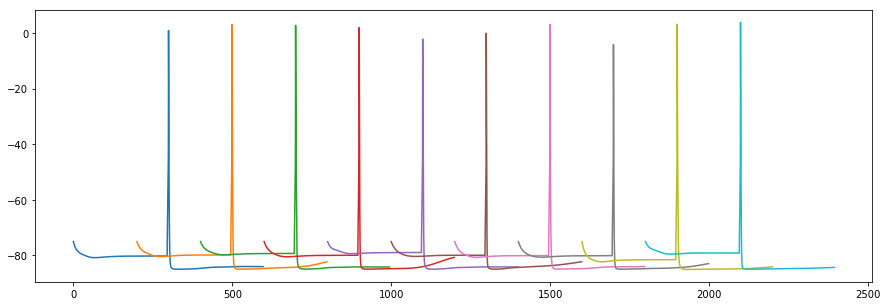

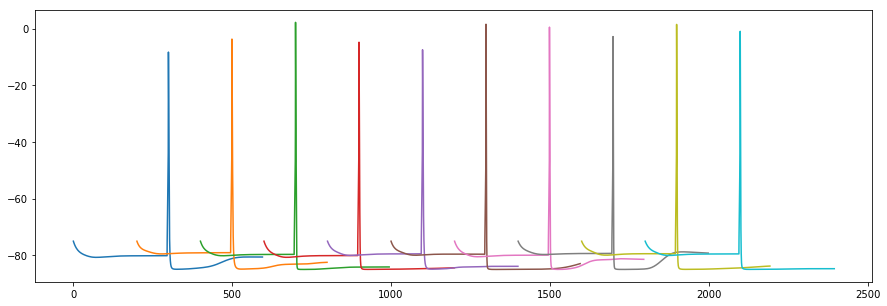

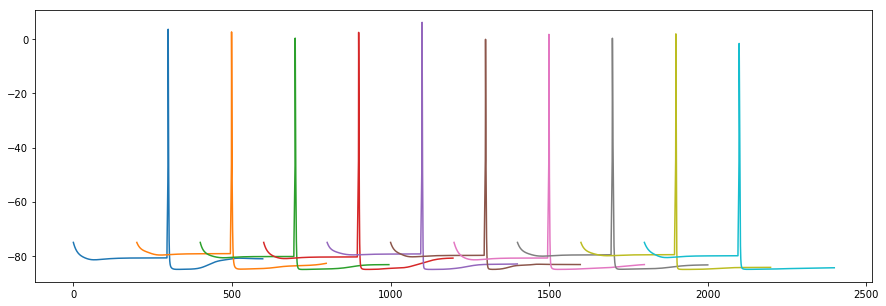

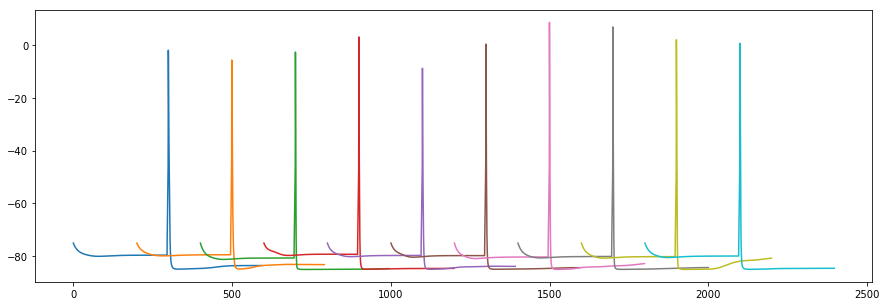

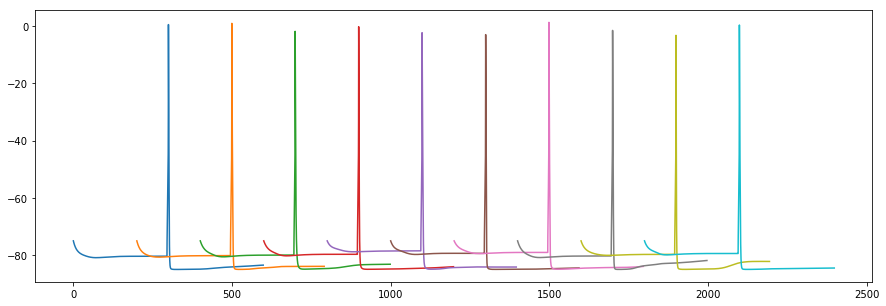

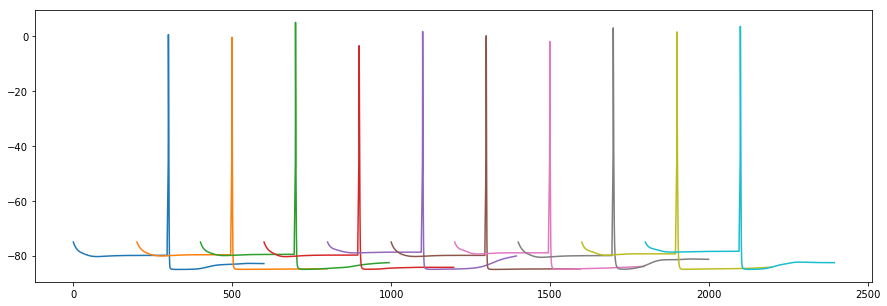

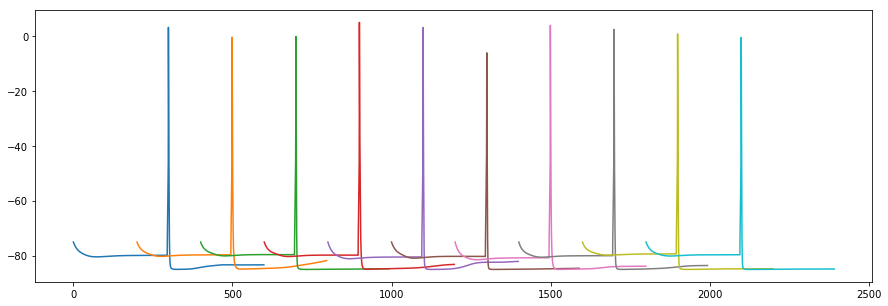

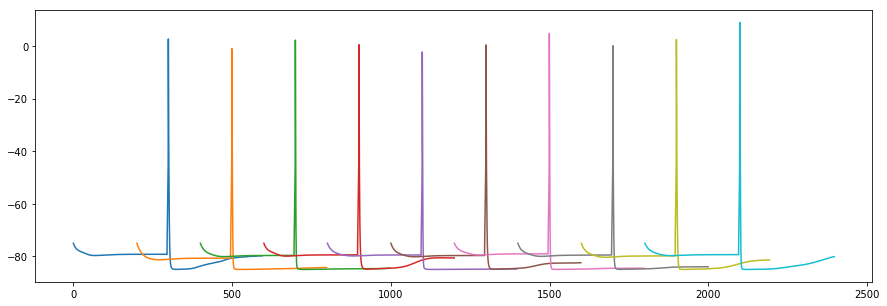

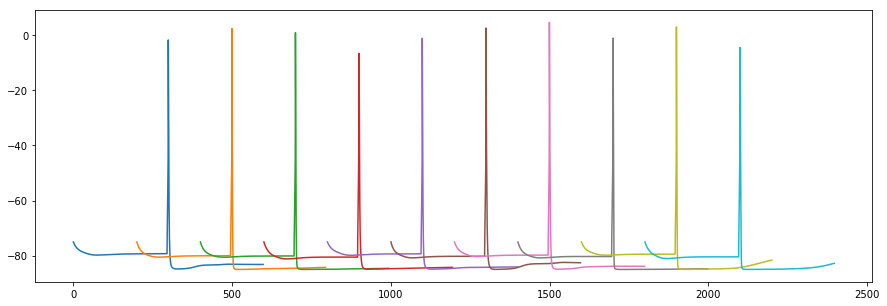

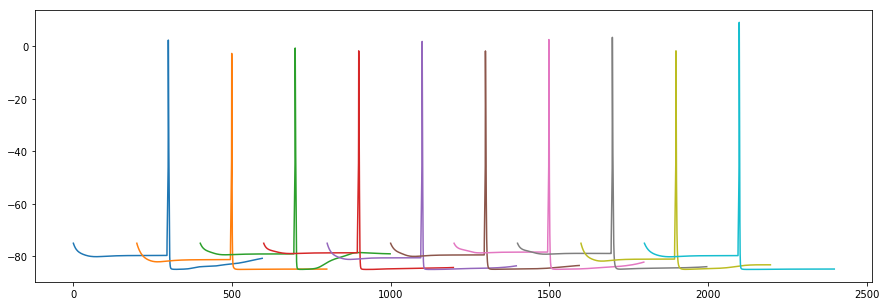

In [21]:
counter = 0
for _ in range(10):

    fig, ax = plt.subplots(1,1, figsize=(15, 5))

    for i in range(10):
        counter += 1
        output = simulator_wrapper(saved_samples[counter])
        #x = summary_stats(output, n_xcorr=0, n_mom=4)
        #plt.plot(output['bAP.hay_measure']['tVec']+(i*200), output['bAP.hay_measure']['vList'][0], linewidth=3.0)
        plt.plot(output['BAC.hay_measure']['tVec']+(i*200), output['BAC.hay_measure']['vList'][0])
    #plt.savefig('../results/figures/200623_round1_SNL_posteriorPredictives_VI_BAC.png', dpi=200, bbox_inches='tight')
    plt.show()

### Prior predictives

In [44]:
with open('../results/samples/200617_prior_theta.pickle', 'rb') as handle:
    theta_list=pickle.load(handle)

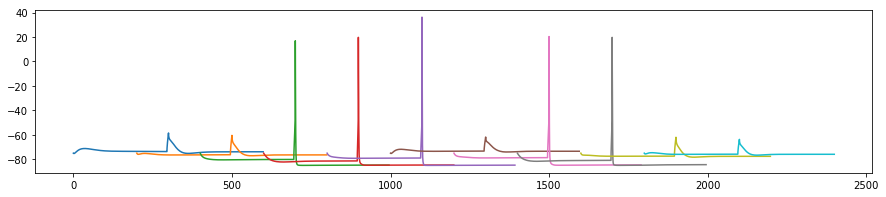

In [46]:
fig, ax = plt.subplots(1,1, figsize=(15, 3))

for i in range(10):
    output = simulator_wrapper(theta_list[i])
    x = summary_stats(output, n_xcorr=0, n_mom=4)
    
    plt.plot(output['BAC.hay_measure']['tVec']+(i*200), output['BAC.hay_measure']['vList'][0])
plt.savefig('../results/figures/200618_round1_SNPE_priorPredictives1.png', dpi=200, bbox_inches='tight')
plt.show()